# Introduction

In "Introduction to SQL," we wrote queries that filtered rows and columns in a database table. Each of the queries we ran returned multiple rows of values. In this mission, we'll go over how to calculate the sum, average, minimum, or maximum of these results.

We'll also learn how to calculate summary statistics on subsets of a database table by working with data on job outcomes, compiled by FiveThirtyEight.

Here's how the first 5 rows of the data look:

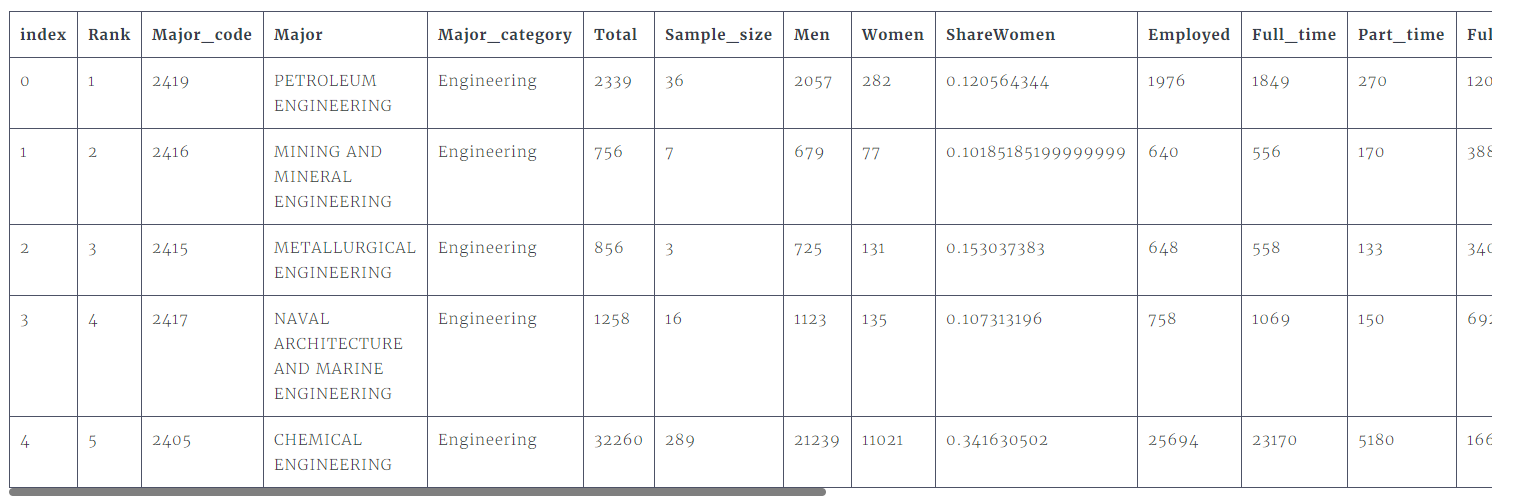


### Setup

In [1]:
%%capture
%load_ext sql
%sql sqlite:///jobs.db

## A simple question

Before we begin working on our questions, let's start with this: What is the lowest proportion of women on the recent_grads table?

One of way of thinking about this question is that we want to "determine the minimum value of ShareWomen" — recall that ShareWomen gives us the proportion of women graduates. To address this question, we'll focus on the three majors with the three lowest proportion of graduates who are women:

In [2]:
%%sql

SELECT *
 FROM recent_grads
 ORDER BY Sharewomen ASC
 LIMIT 3

 * sqlite:///jobs.db
Done.


[(65, 66, 2599, 'MISCELLANEOUS ENGINEERING TECHNOLOGIES', 'Engineering', 8804, 125, 124, 0, 0.0, 7502, 7001, 1240, 5825, 416, 0.05253852, 40000, 30400, 56000, 2446, 3896, 386),
 (61, 62, 3603, 'MOLECULAR BIOLOGY', 'Biology & Life Science', 18300, 90, 4419, 371, 0.07745302700000001, 11581, 9441, 4590, 6183, 1067, 0.084361164, 40000, 29000, 47000, 7225, 3145, 1168),
 (31, 32, 2500, 'ENGINEERING TECHNOLOGIES', 'Engineering', 3600, 39, 16820, 1678, 0.09071250900000001, 2799, 2257, 689, 1723, 163, 0.055030385, 50000, 43000, 60000, 1017, 1269, 142)]

Looking at the sample above, we see that the three lowest ShareWomen values are roughly 0.09, 0.07 and 0, so the minimum is 0. Here's how we can use SQL to answer this question:

In [3]:
%%sql

SELECT MIN(ShareWomen) 
  FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(0.0,)]

We can see that there is at least one major that didn't include any women.

It doesn't actually tell us what those majors are — we only know them because we singled out the three majors with fewer women than men. In a typical table, there are too many rows to find an answer just by looking.

We'll learn how to determine to which rows the lowest value correspond later in the course.

Note that instead of just returning a single value, SQLite returned a table with a column (MIN(ShareWomen)) and the lowest value of ShareWomen as a row in that column (0).

A key idea in SQL is that every result is a table. This is a common visual representation that makes SQL approachable for more users. However, this means that users must convert datasets and calculations that aren't well suited for this representation in a SQL environment.

*Write a query that returns the lowest unemployment rate.*

In [4]:
%%sql

SELECT MIN(Unemployment_rate)
FROM recent_grads

 * sqlite:///jobs.db
Done.


[(0.0,)]

## Aggregate functions

 We introduced the syntax MIN(column_name). This is an example of the broader syntax of functions. A function takes in input and produces the output of the function.

In MIN(ShareWomen), we saw the following:

- The input ShareWomen
- The function MIN
- The output 0.0

We call this function an aggregate function. **Aggregate functions** apply over columns of values and return a single value. The MIN and MAX functions, for example, calculate and return the minimum and maximum values in a column.

Some other commonly used aggregate functions include the following:

- AVG — returns the mean of its input.
- COUNT — counts the number of values in its input.
- SUM — sums the values in its input.


Note the use of capital letters for the functions' names. This isn't necessary to run the query, but it's a common convention that functions (just like other reserved words) should be uppercase. You should also use uppercase letters to the answer-checker can correctly validate your answer.

*Write a query that computes the sum of the Total column.*

In [5]:
%%sql 

SELECT SUM(Total)
  FROM recent_grads

 * sqlite:///jobs.db
Done.


[(6776015,)]

## Order of execution

On this screen, we'll answer these questions:

- How many majors included mostly women?
- How many majors included mostly men?

To answer the first question, we'd like to count the students. On the last screen, we learned that there is an aggregate function that counts the number of values in the input: COUNT.

A query could answer the question:

In [6]:
%%sql

SELECT COUNT(Major)
  FROM recent_grads
 WHERE ShareWomen > 0.5;

 * sqlite:///jobs.db
Done.


[(97,)]

But does it really work? You may be wondering if COUNT(Major) counts the rows before or after the WHERE clause executes.

The answer is that it **runs after**! So this query will find the answer.

Let's quickly summarize what a query looks like using all the clauses we've learned so far:

```
SELECT *
  FROM some_table
 WHERE some_condition
 ORDER BY some_column
 LIMIT some_limit
 ```
 
Here is the order in which the clauses run:

- FROM
- WHERE
- SELECT
- ORDER BY
- LIMIT

Since aggregate functions are part of SELECT, the calculation happens after WHERE acts.

*Write a query that returns the number of majors that include mostly men.*

In [7]:
%%sql

SELECT COUNT(Major)
 FROM recent_grads
 WHERE Sharewomen < 0.5

 * sqlite:///jobs.db
Done.


[(76,)]

## Missing values

Sometimes, for various reasons, tables don't contain values in certain cells (a cell is an intersection of a row and a column in a table).

When this happens, we make any of the following statements (or variations of them):

- The value is missing.
- It's a missing value.
- The value is NULL.
    - NULL is a special entity in SQL that exists to capture the concept of missing value.
    
**This is important when using aggregate functions because most of them ignore missing values.**


For example, if we were to select COUNT(Primes) in the table below, the result would be 3 due to the missing value in the third row.

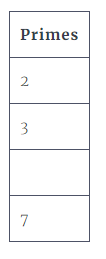

So we must know we don't have null values in a column before we can use it to count the numbers of rows.

To avoid this, we can resort to the * and pass it into COUNT as if it were a column name. So, in the table above, we'd use COUNT(*) instead of COUNT(Primes).


In this screen's exercise we will ask you to use COUNT to find a column with at least a missing value. You can do this by running the query below, replacing <column_name> with the name of the columns in recent_grads until you find a suspicious result. 

In [8]:
%%sql 

SELECT COUNT(*), COUNT(Rank), COUNT(Major_code), COUNT(Major), COUNT(Major_category), COUNT(Total),
       COUNT(Sample_size), COUNT(Men), COUNT(Women), COUNT(ShareWomen), COUNT(Employed), COUNT(Full_time_year_round),
       COUNT(Unemployment_rate)
 FROM recent_grads
 

 * sqlite:///jobs.db
Done.


[(173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 172)]

Unemployment rate has 1 missing value.


## Combining multiple aggregation functions

Instead of writing an individual query for specific question we want to answer, we can actually write queries that answer multiple questions at once. Let's consider the following questions:

- What's the lowest median salary?
- What's the highest median salary?
- What's the total number of students?

We can select multiple columns by including their names with commas, like this:

In [9]:
%%sql

SELECT Major, Major_category
 FROM recent_grads
 LIMIT 5;

 * sqlite:///jobs.db
Done.


[('PETROLEUM ENGINEERING', 'Engineering'),
 ('MINING AND MINERAL ENGINEERING', 'Engineering'),
 ('METALLURGICAL ENGINEERING', 'Engineering'),
 ('NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'Engineering'),
 ('CHEMICAL ENGINEERING', 'Engineering')]

We can use the same principle to combine multiple aggregation functions into a single query:

In [10]:
%%sql

SELECT MIN(Median), MAX(Median), SUM(Total)
  FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(22000, 110000, 6776015)]

*Write a query that calculates the average of the Total column, the minimum of the Men column, and the maximum of the Women column, in that order.*

In [11]:
%%sql

SELECT AVG(Total), MIN(Men), MAX(Women)
  FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(39167.71676300578, 119, 307087)]

## Customizing results

All of the queries we've written so far have had somewhat unpleasant column names in the results, like AVG(SUM) and MIN(Men).

Many companies use SQL environments and tools that can run your query, turn the results into a plot of your choosing, and then create a PDF report containing multiple plots (and some additional explanation from the user).

Since others may interpret the results of your SQL queries, it's helpful to specify custom names for the columns in our results.

We can do that using AS:

```
SELECT SUM(Total) AS num_students
  FROM recent_grads;
```

**This is known as an alias**, and it is restricted to only our results table (the table in the database won't be renamed)

If we use certain characters, like spaces, we need to surround the alias with quotes. We can specify an arbitrary phrase as a string using quotation marks:

In [12]:
%%sql

SELECT SUM(Total) AS 'Total Students'
 FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(6776015,)]

We can drop AS entirely and just add the name next to the original column:

In [13]:
%%sql

SELECT SUM(Total) 'Total Students'
 FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(6776015,)]

(We'll keep using it, though because it's a matter of style.) Lastly, we can reference renamed columns when writing longer queries to make our code more compact:

In [14]:
%%sql

SELECT Major AS m, Major_category AS mc, Unemployment_rate AS ur
  FROM recent_grads
 WHERE (mc = 'Engineering') AND (ur > 0.04 and ur < 0.08)
 ORDER BY ur DESC

 * sqlite:///jobs.db
Done.


[('GEOLOGICAL AND GEOPHYSICAL ENGINEERING', 'Engineering', 0.075038285),
 ('MISCELLANEOUS ENGINEERING', 'Engineering', 0.074392523),
 ('CIVIL ENGINEERING', 'Engineering', 0.07060957400000001),
 ('COMPUTER ENGINEERING', 'Engineering', 0.065409275),
 ('AEROSPACE ENGINEERING', 'Engineering', 0.065162085),
 ('ARCHITECTURAL ENGINEERING', 'Engineering', 0.061930782999999996),
 ('CHEMICAL ENGINEERING', 'Engineering', 0.061097712),
 ('GENERAL ENGINEERING', 'Engineering', 0.059824231),
 ('ELECTRICAL ENGINEERING', 'Engineering', 0.059173845),
 ('MECHANICAL ENGINEERING', 'Engineering', 0.057342277999999997),
 ('MECHANICAL ENGINEERING RELATED TECHNOLOGIES', 'Engineering', 0.056357078),
 ('ENGINEERING TECHNOLOGIES', 'Engineering', 0.055030385),
 ('MISCELLANEOUS ENGINEERING TECHNOLOGIES', 'Engineering', 0.05253852),
 ('NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'Engineering', 0.050125313),
 ('INDUSTRIAL AND MANUFACTURING ENGINEERING', 'Engineering', 0.042875544)]

*Write a query that returns the following in this order:*
- *The number of rows as Number of Majors*
- *The maximum value of Unemployment_rate as Highest Unemployment Rate*

In [15]:
%%sql

SELECT COUNT(*) AS "Number of Majors",
       MAX(Unemployment_rate) AS "Highest Unemployment Rate"
    FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(173, 0.177226407)]

## Counting unique values

Major_category is a column with only a few unique values. What if we want to get a list with repetitions of the values in this column? Or what if we want to determine how many distinct values there are in this column?

We can return all of the unique values in a column using the DISTINCT statement.

In [16]:
%%sql 

SELECT DISTINCT Major_category
  FROM recent_grads;

 * sqlite:///jobs.db
Done.


[('Engineering',),
 ('Business',),
 ('Physical Sciences',),
 ('Law & Public Policy',),
 ('Computers & Mathematics',),
 ('Agriculture & Natural Resources',),
 ('Industrial Arts & Consumer Services',),
 ('Arts',),
 ('Health',),
 ('Social Science',),
 ('Biology & Life Science',),
 ('Education',),
 ('Humanities & Liberal Arts',),
 ('Psychology & Social Work',),
 ('Communications & Journalism',),
 ('Interdisciplinary',)]

As with the other SQL clauses we've learned, we can use the DISTINCT statement with multiple columns to return unique pairings of those columns:

In [17]:
%%sql 

SELECT DISTINCT Major, Major_category
  FROM recent_grads
 LIMIT 5;

 * sqlite:///jobs.db
Done.


[('PETROLEUM ENGINEERING', 'Engineering'),
 ('MINING AND MINERAL ENGINEERING', 'Engineering'),
 ('METALLURGICAL ENGINEERING', 'Engineering'),
 ('NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'Engineering'),
 ('CHEMICAL ENGINEERING', 'Engineering')]

Lastly, we can count the number of unique values in a column by nesting the COUNT() function with the DISTINCT clause:

In [18]:
%%sql

SELECT COUNT(DISTINCT Major_category) AS unique_major_categories
  FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(16,)]

*Write a query that returns the number of unique values in the Major, Major_category, and Major_code columns.*

In [19]:
%%sql

SELECT COUNT(DISTINCT Major) AS unique_majors,
       COUNT(DISTINCT Major_category) AS unique_major_categories,
       COUNT(DISTINCT Major_code) AS unique_major_codes
    FROM recent_grads;

 * sqlite:///jobs.db
Done.


[(173, 16, 173)]

## Data Types

Let's run a query and look at the result.

In [20]:
%%sql

SELECT Major, Total, Men, Women, Unemployment_rate
  FROM recent_grads
 ORDER BY Unemployment_rate DESC
 LIMIT 3;

 * sqlite:///jobs.db
Done.


[('NUCLEAR ENGINEERING', 2573, 2200, 373, 0.177226407),
 ('PUBLIC ADMINISTRATION', 5629, 2947, 2682, 0.15949059999999998),
 ('COMPUTER NETWORKING AND TELECOMMUNICATIONS', 7613, 5291, 2322, 0.151849807)]

Let's consider the different kinds of values we got:

- In the Major column, we see text.
- In the Total, Men, and Women columns, we see integers.
- In the Unemployment_rate column, we see decimal numbers.

Each of the above is a data type. Each column has exactly one type of value; it can't be mixed.

You can read more about the SQLite data types here. We'll explore them from the point of view of the database when we learn how to create tables.

For now, we'll focus on some of the things we can do with different data types.

## String functions and operations


Previously, we learned about aggregate functions. Aggregate functions take a column as input and return one value for the column. Now, we'll learn about functions that, when we pass them a column as input, return (a transformation of the input) another column. The values of text columns are typically called strings.

We'll start with the LENGTH function. Given a text column, the LENGTH function returns the number of characters in the input strings.

Let's build on the query we saw on the previous screen to see it action.

In [21]:
%%sql

SELECT Major,
       Total, Men, Women, Unemployment_rate,
       LENGTH(Major) AS Length_of_name
  FROM recent_grads
 ORDER BY Unemployment_rate DESC
 LIMIT 3;

 * sqlite:///jobs.db
Done.


[('NUCLEAR ENGINEERING', 2573, 2200, 373, 0.177226407, 19),
 ('PUBLIC ADMINISTRATION', 5629, 2947, 2682, 0.15949059999999998, 21),
 ('COMPUTER NETWORKING AND TELECOMMUNICATIONS', 7613, 5291, 2322, 0.151849807, 42)]

We can also concatenate strings by using the || operator. Here's an example:

In [22]:
%%sql

SELECT 'Data' || 'quest' as 'e-learning';

 * sqlite:///jobs.db
Done.


[('Dataquest',)]

We signaled the use of strings by using single quotes ('), double quotes ("); however, double quotes also work. Other databases more universally accept single quotes rather than double quotes, so it's a good habit to form.

In the same way that we can compare columns with both constant numbers and other columns in WHERE clauses, we can also mix columns and constant strings when concatenating. For example:

In [23]:
%%sql

SELECT 'Cat: ' || Major_category
  FROM recent_grads
 LIMIT 2;


 * sqlite:///jobs.db
Done.


[('Cat: Engineering',), ('Cat: Engineering',)]

In the following exercise, you'll use the LOWER function to replace the Major column with one where all values appear in lowercase letters. We use this just like the LENGTH function.

In [24]:
%%sql

SELECT 'Major: ' || LOWER(Major) AS Major,
        Total, Men, Women, Unemployment_rate,
        LENGTH(Major) AS Length_of_name
    FROM recent_grads
    ORDER BY Unemployment_rate DESC
    LIMIT 5;

 * sqlite:///jobs.db
Done.


[('Major: nuclear engineering', 2573, 2200, 373, 0.177226407, 19),
 ('Major: public administration', 5629, 2947, 2682, 0.15949059999999998, 21),
 ('Major: computer networking and telecommunications', 7613, 5291, 2322, 0.151849807, 42),
 ('Major: clinical psychology', 2838, 568, 2270, 0.14904819800000002, 19),
 ('Major: public policy', 5978, 2695, 905, 0.128426299, 13)]

## Performing arithmetic in SQL

Let's revisit one of the questions from the beginning of the mission:

- Which majors had the largest spread (difference) between the 25th and 75th percentile starting salaries?

In the same way that we can use string functions and operators, we can also perform arithmetic on the columns in a table. SQL supports the standard arithmetic operators: *, +, -, and /, and we can use them like any other operator:

```
SELECT P75th - P25th quartile_spread
  FROM recent_grads
 LIMIT 10;
```

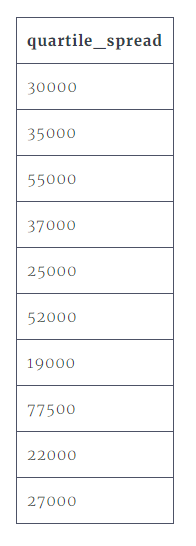

You can also add, subtract, multiply, or divide columns by individual values:



In [25]:
%%sql 

SELECT ShareWomen * 100 percent_female 
   FROM recent_grads 
  LIMIT 10

 * sqlite:///jobs.db
Done.


[(12.0564344,),
 (10.1851852,),
 (15.3037383,),
 (10.731319599999999,),
 (34.1630502,),
 (14.4966965,),
 (53.571428600000004,),
 (44.135557299999995,),
 (13.979280099999999,),
 (43.7846874,)]

One thing to note is that multiplying or dividing columns with a floating point value (or a column with floating point values) will result in floating point values:

- Two floats — returns a float.
    - SELECT 100.0 / 100.0 returns 1.0.
- A float and an integer — returns a float
    - SELECT 100 / 1.0 returns 100.0.
- Two integers — returns an integer
    - SELECT 100 / 10 returns 10

*Write a query that computes the difference between the 25th and 75th percentiles of salaries for all majors.*

In [26]:
%%sql

SELECT Major, Major_category,
       P25th - P75th AS quartile_spread
  FROM recent_grads
  ORDER BY quartile_spread ASC
  LIMIT 20

 * sqlite:///jobs.db
Done.


[('ASTRONOMY AND ASTROPHYSICS', 'Physical Sciences', -77500),
 ('PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION', 'Health', -70000),
 ('METALLURGICAL ENGINEERING', 'Engineering', -55000),
 ('NUCLEAR ENGINEERING', 'Engineering', -52000),
 ('ENGINEERING MECHANICS PHYSICS AND SCIENCE', 'Engineering', -49000),
 ('MATHEMATICS AND COMPUTER SCIENCE', 'Computers & Mathematics', -48000),
 ('MISCELLANEOUS FINE ARTS', 'Arts', -41000),
 ('COGNITIVE SCIENCE AND BIOPSYCHOLOGY', 'Biology & Life Science', -40000),
 ('FOOD SCIENCE', 'Agriculture & Natural Resources', -38000),
 ('PHYSICS', 'Physical Sciences', -38000),
 ('NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'Engineering', -37000),
 ('PUBLIC ADMINISTRATION', 'Law & Public Policy', -37000),
 ('BIOLOGICAL ENGINEERING', 'Engineering', -36000),
 ('MINING AND MINERAL ENGINEERING', 'Engineering', -35000),
 ('PUBLIC POLICY', 'Law & Public Policy', -35000),
 ('MEDICAL ASSISTING SERVICES', 'Health', -35000),
 ('BIOMEDICAL ENGINEERING', 'Engineering', -34000),
 ('STATISTICS AND DECISION SCIENCE', 'Computers & Mathematics', -33300),
 ('GENERAL ENGINEERING', 'Engineering', -33000),
 ('COMPUTER SCIENCE', 'Computers & Mathematics', -31000)]